In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import essential libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


In [4]:
# Load the dataset (For both EDA and model training separately)
data_eda = pd.read_csv('/content/drive/MyDrive/Credit Risk Project/credit_risk_dataset.csv')
data_model = pd.read_csv('/content/drive/MyDrive/Credit Risk Project/credit_risk_dataset.csv')


In [5]:
# Display basic info and summary statistics
print(data_eda.info())
print(data_eda.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None
         person_age  perso

In [6]:
# Check for missing values
print(data_eda.isnull().sum())


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64


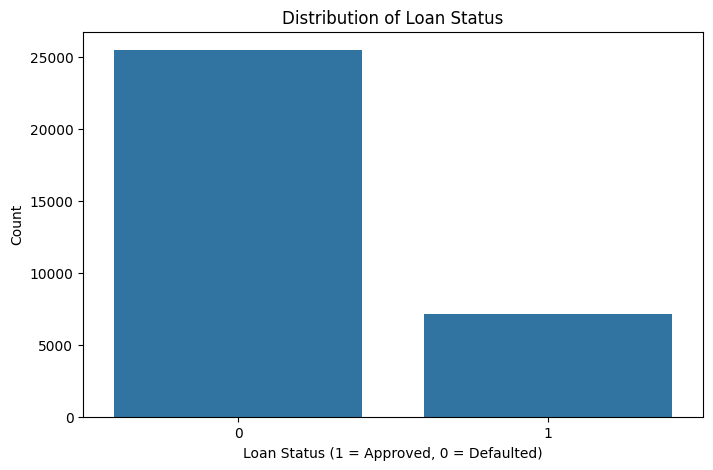

In [7]:
# Check for class imbalance in the target variable
print(data_eda['loan_status'].value_counts(normalize=True))

# Visualize loan status distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data_eda, x='loan_status')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (1 = Approved, 0 = Defaulted)')
plt.ylabel('Count')
plt.show()


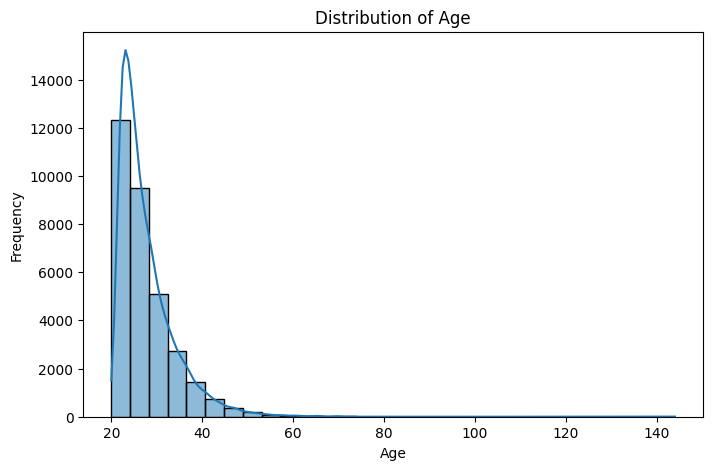

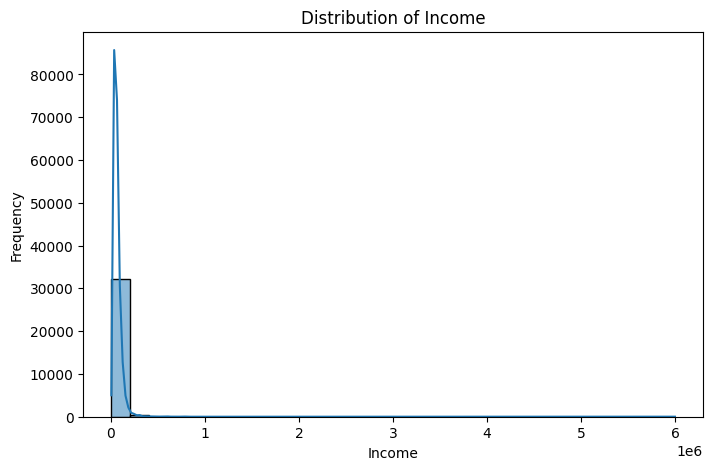

In [8]:
# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data_eda['person_age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Income Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data_eda['person_income'], kde=True, bins=30)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


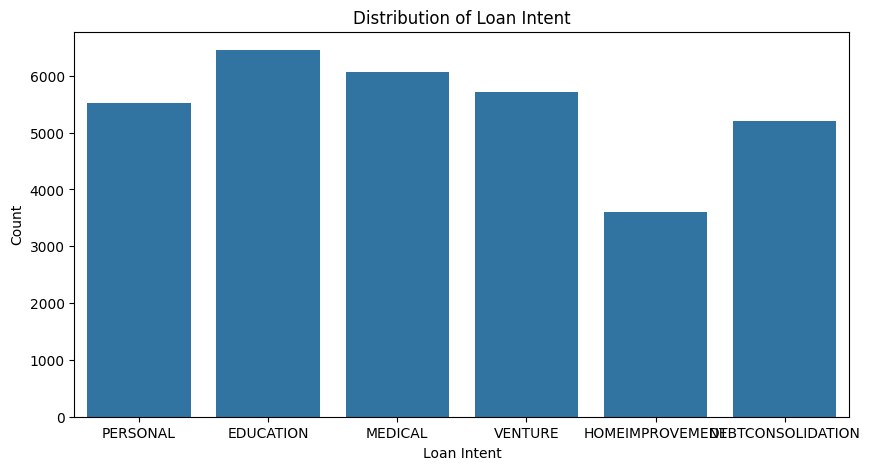

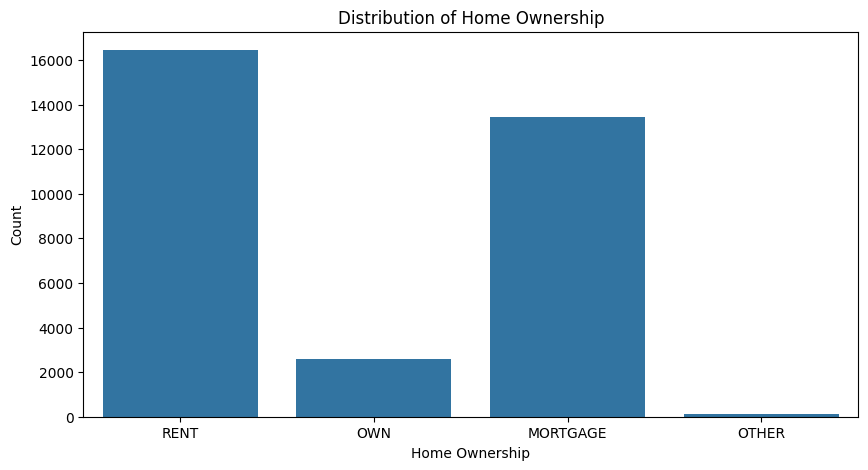

In [9]:
# Plot categorical features (e.g., loan intent, home ownership)
plt.figure(figsize=(10, 5))
sns.countplot(data=data_eda, x='loan_intent')
plt.title('Distribution of Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=data_eda, x='person_home_ownership')
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()


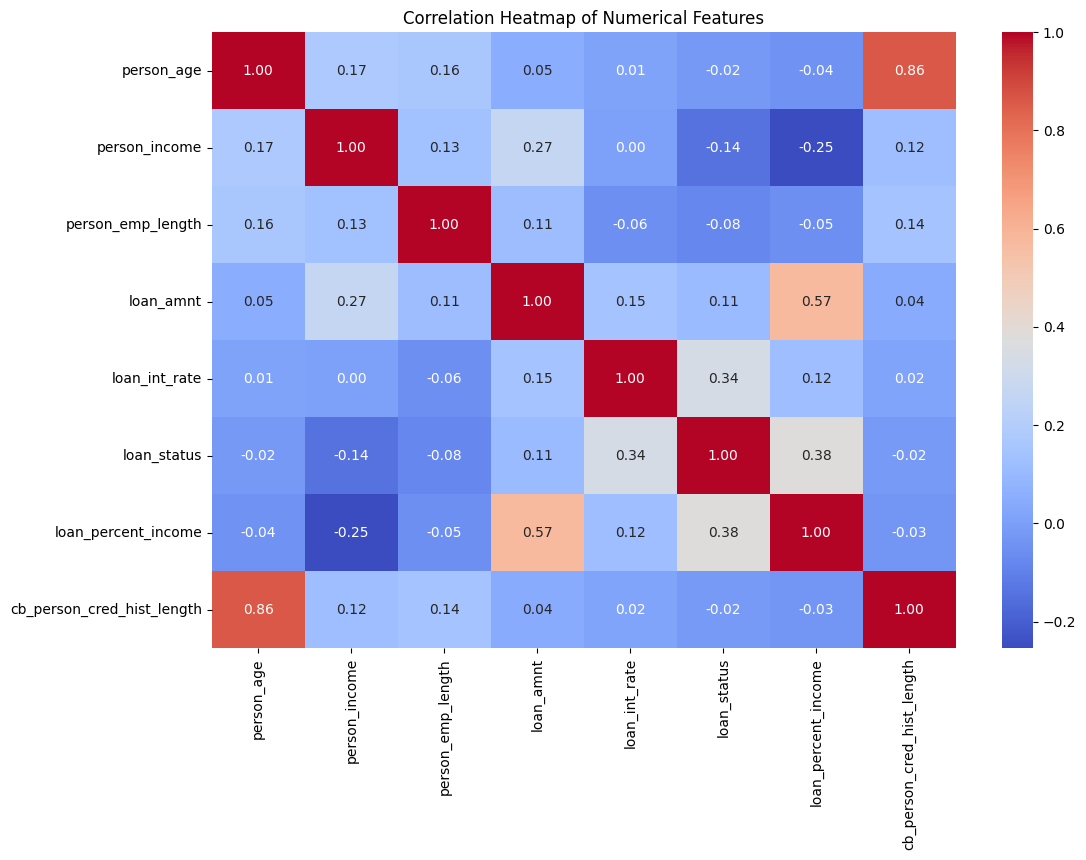

In [10]:
# Select only numerical columns for the correlation matrix
numerical_data_eda = data_eda.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for numerical features only
correlation_matrix = numerical_data_eda.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()



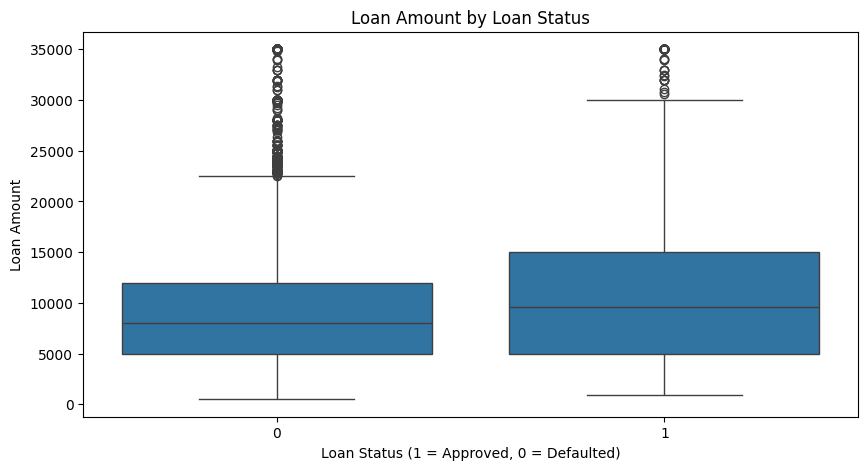

In [11]:
# Loan amount by loan status
plt.figure(figsize=(10, 5))
sns.boxplot(data=data_eda, x='loan_status', y='loan_amnt')
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status (1 = Approved, 0 = Defaulted)')
plt.ylabel('Loan Amount')
plt.show()


In [12]:
# Fill missing values in 'person_emp_length' and 'loan_int_rate' columns with mean or median
data_model['person_emp_length'].fillna(data_model['person_emp_length'].median(), inplace=True)
data_model['loan_int_rate'].fillna(data_model['loan_int_rate'].mean(), inplace=True)


<ipython-input-12-111d2c67657b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_model['person_emp_length'].fillna(data_model['person_emp_length'].median(), inplace=True)
<ipython-input-12-111d2c67657b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [13]:
# Encode categorical features
label_encoders = {}
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

for col in categorical_columns:
    le = LabelEncoder()
    data_model[col] = le.fit_transform(data_model[col])
    label_encoders[col] = le  # Save encoder for future use


In [14]:
# Separate features and target variable
X = data_model.drop('loan_status', axis=1)
y = data_model['loan_status']

# Standardize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8126 - loss: 0.4539 - val_accuracy: 0.8488 - val_loss: 0.3584
Epoch 2/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8534 - loss: 0.3578 - val_accuracy: 0.8607 - val_loss: 0.3443
Epoch 3/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8551 - loss: 0.3486 - val_accuracy: 0.8623 - val_loss: 0.3411
Epoch 4/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8593 - loss: 0.3440 - val_accuracy: 0.8671 - val_loss: 0.3303
Epoch 5/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8621 - loss: 0.3348 - val_accuracy: 0.8719 - val_loss: 0.3254
Epoch 6/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8675 - loss: 0.3266 - val_accuracy: 0.8744 - val_loss: 0.3145
Epoch 7/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8756 - loss: 0.3111 - val_accuracy: 0.8770 - val_loss: 0.3127
Epoch 8/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8784 - loss: 0.3107 - val_accuracy: 0.

In [19]:
# Evaluate model performance on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8935 - loss: 0.2765
Test Accuracy: 0.90


In [20]:
# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      5072
           1       0.86      0.64      0.74      1445

    accuracy                           0.90      6517
   macro avg       0.88      0.81      0.84      6517
weighted avg       0.90      0.90      0.89      6517

ROC AUC Score: 0.8076540037985874


In [42]:
# Save the trained model
model.save('credit_risk_model.h5')


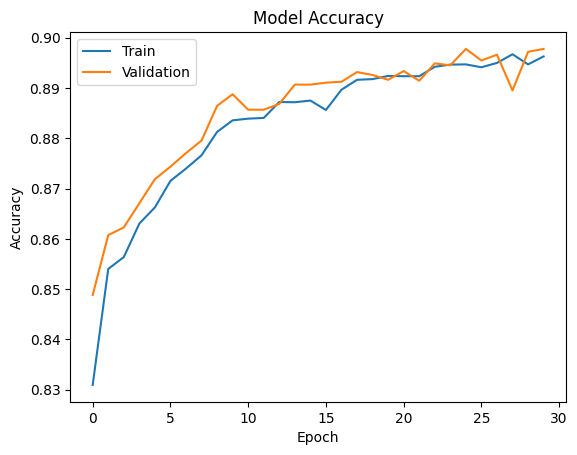

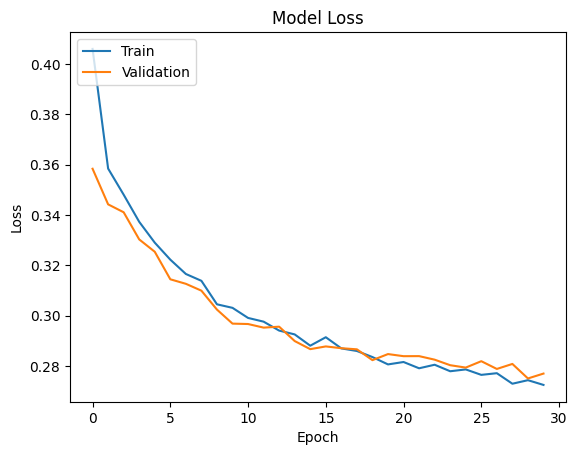

In [21]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [22]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import numpy as np

# Assume `X` and `y` have already been prepared for modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the neural network model
nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


815/815 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8069 - loss: 0.4494
Epoch 2/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8502 - loss: 0.3652
Epoch 3/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8619 - loss: 0.3423
Epoch 4/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8692 - loss: 0.3298
Epoch 5/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8708 - loss: 0.3255
Epoch 6/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8667 - loss: 0.3258
Epoch 7/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8784 - loss: 0.3132
Epoch 8/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8824 - loss: 0.3042
Epoch 9/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8793 - loss: 0.3089
Epoch 10/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8918 - loss: 0.2872
Epoch 11/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8898 - loss: 0.2907
Epoch 12/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy

In [23]:
# Generate predictions on training and test data
train_nn_pred = nn_model.predict(X_train).flatten()  # Predictions on training data
test_nn_pred = nn_model.predict(X_test).flatten()    # Predictions on test data

# Add predictions as new features to the original training and test sets
X_train_ensemble = np.column_stack((X_train, train_nn_pred))
X_test_ensemble = np.column_stack((X_test, test_nn_pred))


815/815 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
# Define base learners (Random Forest and XGBoost)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train base learners on the augmented training set
rf_model.fit(X_train_ensemble, y_train)
xgb_model.fit(X_train_ensemble, y_train)

# Make predictions from base learners on the test set
rf_pred = rf_model.predict(X_test_ensemble)
xgb_pred = xgb_model.predict(X_test_ensemble)

# Stack the predictions from the base models to create a new feature set for the meta-learner
meta_features = np.column_stack((rf_pred, xgb_pred, test_nn_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:42:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [25]:
# Train Logistic Regression as the meta-learner
meta_learner = LogisticRegression()
meta_learner.fit(meta_features, y_test)

# Predict final ensemble output on the test set
final_predictions = meta_learner.predict(meta_features)


In [26]:
# Calculate accuracy
accuracy = accuracy_score(y_test, final_predictions)
print(f'Ensemble Model Accuracy: {accuracy:.2f}')

# Display classification report and ROC AUC score
print("Classification Report:\n", classification_report(y_test, final_predictions))
print("ROC AUC Score:", roc_auc_score(y_test, final_predictions))



Ensemble Model Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.93      0.74      0.82      1445

    accuracy                           0.93      6517
   macro avg       0.93      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517

ROC AUC Score: 0.8603279556394834


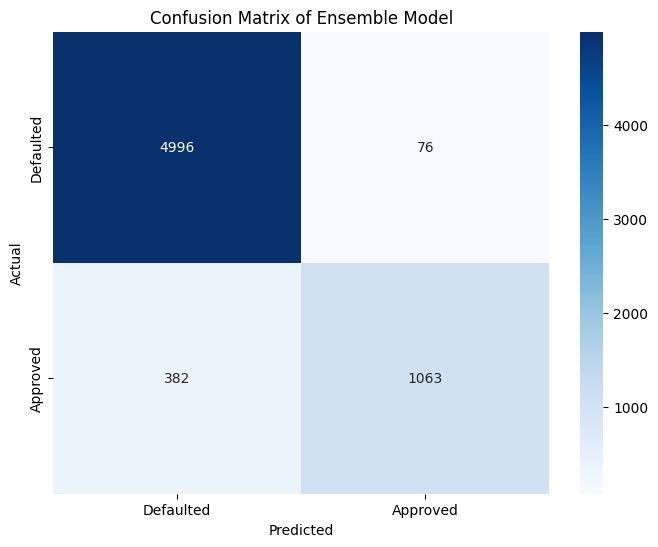

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, final_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Defaulted', 'Approved'], yticklabels=['Defaulted', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Ensemble Model')
plt.show()





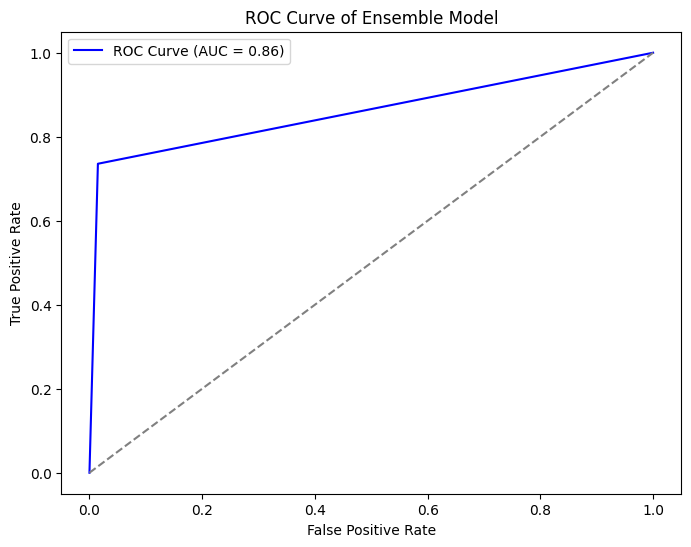

In [28]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve for the ensemble model
fpr, tpr, thresholds = roc_curve(y_test, final_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Ensemble Model')
plt.legend()
plt.show()


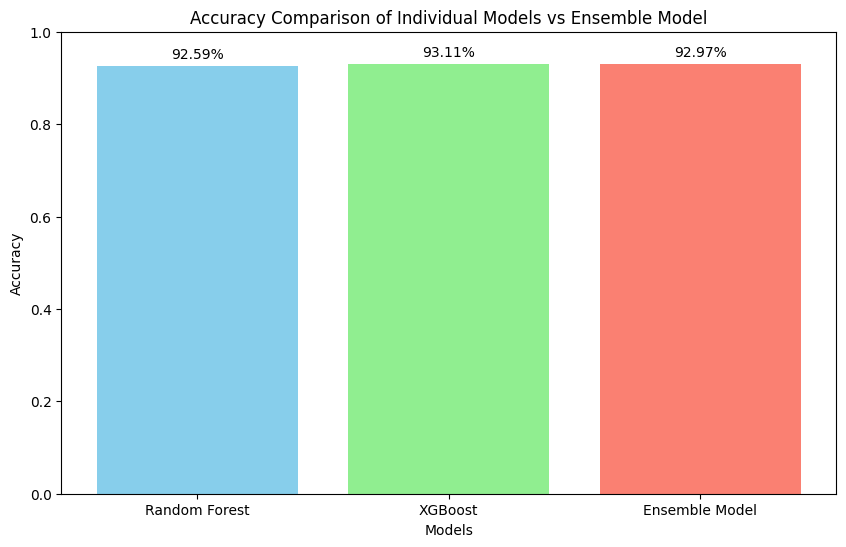

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Calculate accuracies of individual models and ensemble model
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
ensemble_accuracy = accuracy_score(y_test, final_predictions)

# Prepare data for the bar chart
model_names = ['Random Forest', 'XGBoost', 'Ensemble Model']
accuracies = [rf_accuracy, xgb_accuracy, ensemble_accuracy]

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Individual Models vs Ensemble Model')

# Add accuracy values on top of each bar
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{accuracy:.2%}", ha='center', va='bottom')

plt.show()


In [30]:
from sklearn.metrics import classification_report

# Display classification reports for each model
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))

print("\nEnsemble Model Classification Report:")
print(classification_report(y_test, final_predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5072
           1       0.95      0.70      0.81      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.88      6517
weighted avg       0.93      0.93      0.92      6517


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.94      0.73      0.83      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517


Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.93      0.74      0.82      1445

    accuracy                           0.93      6517
   macro avg       0

In [31]:
# Compare predictions of each model with ensemble predictions
rf_agreement = (rf_pred == final_predictions).mean()
xgb_agreement = (xgb_pred == final_predictions).mean()

print(f"Agreement between Random Forest and Ensemble: {rf_agreement:.2%}")
print(f"Agreement between XGBoost and Ensemble: {xgb_agreement:.2%}")


Agreement between Random Forest and Ensemble: 98.27%
Agreement between XGBoost and Ensemble: 99.77%


In [32]:
# Identify misclassified instances for each model
rf_misclassified = np.where(rf_pred != y_test)[0]
xgb_misclassified = np.where(xgb_pred != y_test)[0]
ensemble_misclassified = np.where(final_predictions != y_test)[0]

# Calculate overlap of misclassifications
rf_xgb_overlap = len(set(rf_misclassified) & set(xgb_misclassified))
rf_ensemble_overlap = len(set(rf_misclassified) & set(ensemble_misclassified))
xgb_ensemble_overlap = len(set(xgb_misclassified) & set(ensemble_misclassified))

print(f"Misclassification overlap between RF and XGB: {rf_xgb_overlap}")
print(f"Misclassification overlap between RF and Ensemble: {rf_ensemble_overlap}")
print(f"Misclassification overlap between XGB and Ensemble: {xgb_ensemble_overlap}")


Misclassification overlap between RF and XGB: 402
Misclassification overlap between RF and Ensemble: 414
Misclassification overlap between XGB and Ensemble: 446


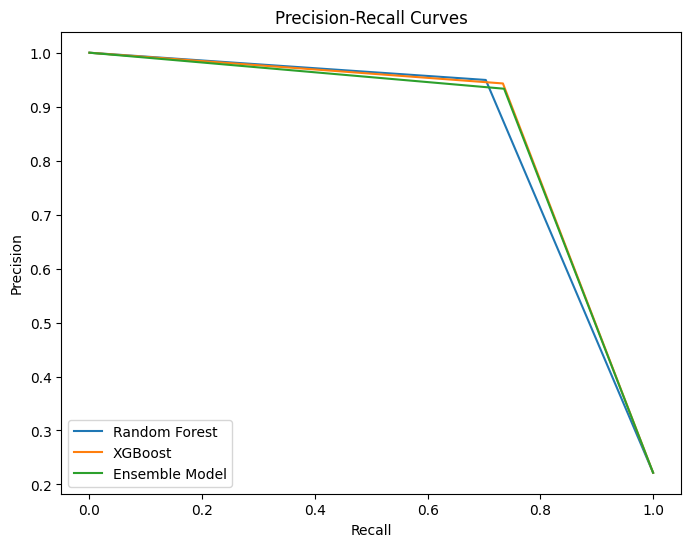

In [33]:
from sklearn.metrics import precision_recall_curve

# Generate precision-recall curves for each model
rf_prec, rf_recall, _ = precision_recall_curve(y_test, rf_pred)
xgb_prec, xgb_recall, _ = precision_recall_curve(y_test, xgb_pred)
ensemble_prec, ensemble_recall, _ = precision_recall_curve(y_test, final_predictions)

# Plot precision-recall curves
plt.figure(figsize=(8, 6))
plt.plot(rf_recall, rf_prec, label="Random Forest")
plt.plot(xgb_recall, xgb_prec, label="XGBoost")
plt.plot(ensemble_recall, ensemble_prec, label="Ensemble Model")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.show()


In [34]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

# Define the neural network model
nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile and train the neural network
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


815/815 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8097 - loss: 0.4361
Epoch 2/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8520 - loss: 0.3631
Epoch 3/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8572 - loss: 0.3496
Epoch 4/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8634 - loss: 0.3384
Epoch 5/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8759 - loss: 0.3158
Epoch 6/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8712 - loss: 0.3214
Epoch 7/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8767 - loss: 0.3113
Epoch 8/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8757 - loss: 0.3117
Epoch 9/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8837 - loss: 0.2990
Epoch 10/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8824 - loss: 0.3023
Epoch 11/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8848 - loss: 0.3008
Epoch 12/30
815/815 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy

In [35]:
# Generate predictions on training and test data
train_nn_pred = nn_model.predict(X_train).flatten()
test_nn_pred = nn_model.predict(X_test).flatten()

# Add neural network predictions as a new feature
X_train_ensemble = np.column_stack((X_train, train_nn_pred))
X_test_ensemble = np.column_stack((X_test, test_nn_pred))


815/815 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [36]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Define base learners (Random Forest and XGBoost)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Use predictions as inputs in stacking model
base_learners = [
    ('rf', rf_model),
    ('xgb', xgb_model)
]

# Define stacking model with meta-learner
stacked_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(), n_jobs=-1)
stacked_model.fit(X_train_ensemble, y_train)


StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importa...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [38]:
# Predict and evaluate on the test set
final_predictions = stacked_model.predict(X_test_ensemble)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, final_predictions)
print(f'Ensemble Model Accuracy with Neural Network Predictions: {accuracy:.2f}')
print("Classification Report:\n", classification_report(y_test, final_predictions))
print("ROC AUC Score:", roc_auc_score(y_test, final_predictions))


Ensemble Model Accuracy with Neural Network Predictions: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.94      0.74      0.83      1445

    accuracy                           0.93      6517
   macro avg       0.93      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517

ROC AUC Score: 0.8640839045768615


In [39]:
from sklearn.base import BaseEstimator, ClassifierMixin

# Define a wrapper for the neural network to return class probabilities
class NeuralNetworkWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        # Model is already trained, so fit does nothing
        pass

    def predict_proba(self, X):
        # Return probabilities for class 1
        probs = self.model.predict(X).flatten()
        return np.column_stack([1 - probs, probs])  # Return as [P(class 0), P(class 1)]


In [40]:
# Wrap the pre-trained neural network model
nn_wrapper = NeuralNetworkWrapper(nn_model)


In [41]:
from sklearn.ensemble import VotingClassifier

# Define Voting Ensemble with soft voting
voting_ensemble = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('nn', nn_wrapper)
    ],
    voting='soft'  # Use probabilities for voting
)

# Train the Voting Classifier
voting_ensemble.fit(X_train, y_train)

# Evaluate Voting Ensemble
voting_predictions = voting_ensemble.predict(X_test)
accuracy_voting = accuracy_score(y_test, voting_predictions)
print(f'Voting Ensemble Accuracy: {accuracy_voting:.2f}')
print("Classification Report:\n", classification_report(y_test, voting_predictions))
print("ROC AUC Score:", roc_auc_score(y_test, voting_predictions))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:46:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Voting Ensemble Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      5072
           1       0.97      0.71      0.82      1445

    accuracy                           0.93      6517
   macro avg       0.95      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517

ROC AUC Score: 0.853643110148123


In [43]:
# Save the ensemble model for future use
import joblib
joblib.dump(stacked_model, 'credit_risk_stacked_model.pkl')


['credit_risk_stacked_model.pkl']